# EXPONENTIAL SMOOTHING

## CONTENT
>- 1- Introduction
>- 2- Switch
>- 3- Encoder

Exponential smoothing was first suggested in the statistical literature without reference to previous work by Robert Goodell Brown in 1956 and then expanded by Charles C. Holt in 1957. Exponential smoothing is a broadly accurate principle for smoothing time series data using the exponential window function. The controlling input of the exponential smoothing calculation is defined as the smoothing factor or the smoothing constant.

As we know that, in the simple moving average, the past observations are weighted equally, exponential functions are used to assign exponentially decreasing weights over time. It is an easily learned and easily applied method for making some determination based on prior assumptions by the user, such as seasonality. Exponential smoothing is generally used for the analysis of time-series data.

# 1-INTRODUTION

Exponential Smoothing Formula
The simplest form of an exponential smoothing formula is given by:

$$y[n] = α*y[n-1] + (1 – α)*x[n]$$

Here,

> s_t:  smoothed statistic, it is the simple weighted average of current observation xt

> st-1: previous smoothed statistic

> α: smoothing factor of data; 0 < α < 1

> t: time period

If the value of the smoothing factor is larger, then the level of smoothing will reduce. Value of α close to 1 has less of a smoothing effect and give greater weight to recent changes in the data, while the value of α closer to zero has a greater smoothing effect and are less responsive to recent changes.

There is no official accurate procedure for choosing α. The statistician’s judgment is used to choose an appropriate factor sometimes. Otherwise, a statistical technique may be used to optimize the value of α. For example, the method of least squares can be used to determine the value of α for which the sum of the quantities is minimized.

Exponential Smoothing Forecasting
Exponential smoothing is generally used to make short term forecasts, but longer-term forecasts using this technique can be quite unreliable. More recent observations given larger weights by exponential smoothing methods, and the weights decrease exponentially as the observations become more distant. When the parameters describing the time series are changing slowly over time, then these methods are most effective.

Exponential Smoothing Methods
There are three main methods to estimate exponential smoothing. They are:

Simple or single exponential smoothing
Double exponential smoothing
Triple exponential smoothing

***

In [34]:
# Packages and adjustments to the figures
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import math

plt.style.use('fivethirtyeight')

# 2- SWITCH

## SWITCH SIGNAL IN ANALOG

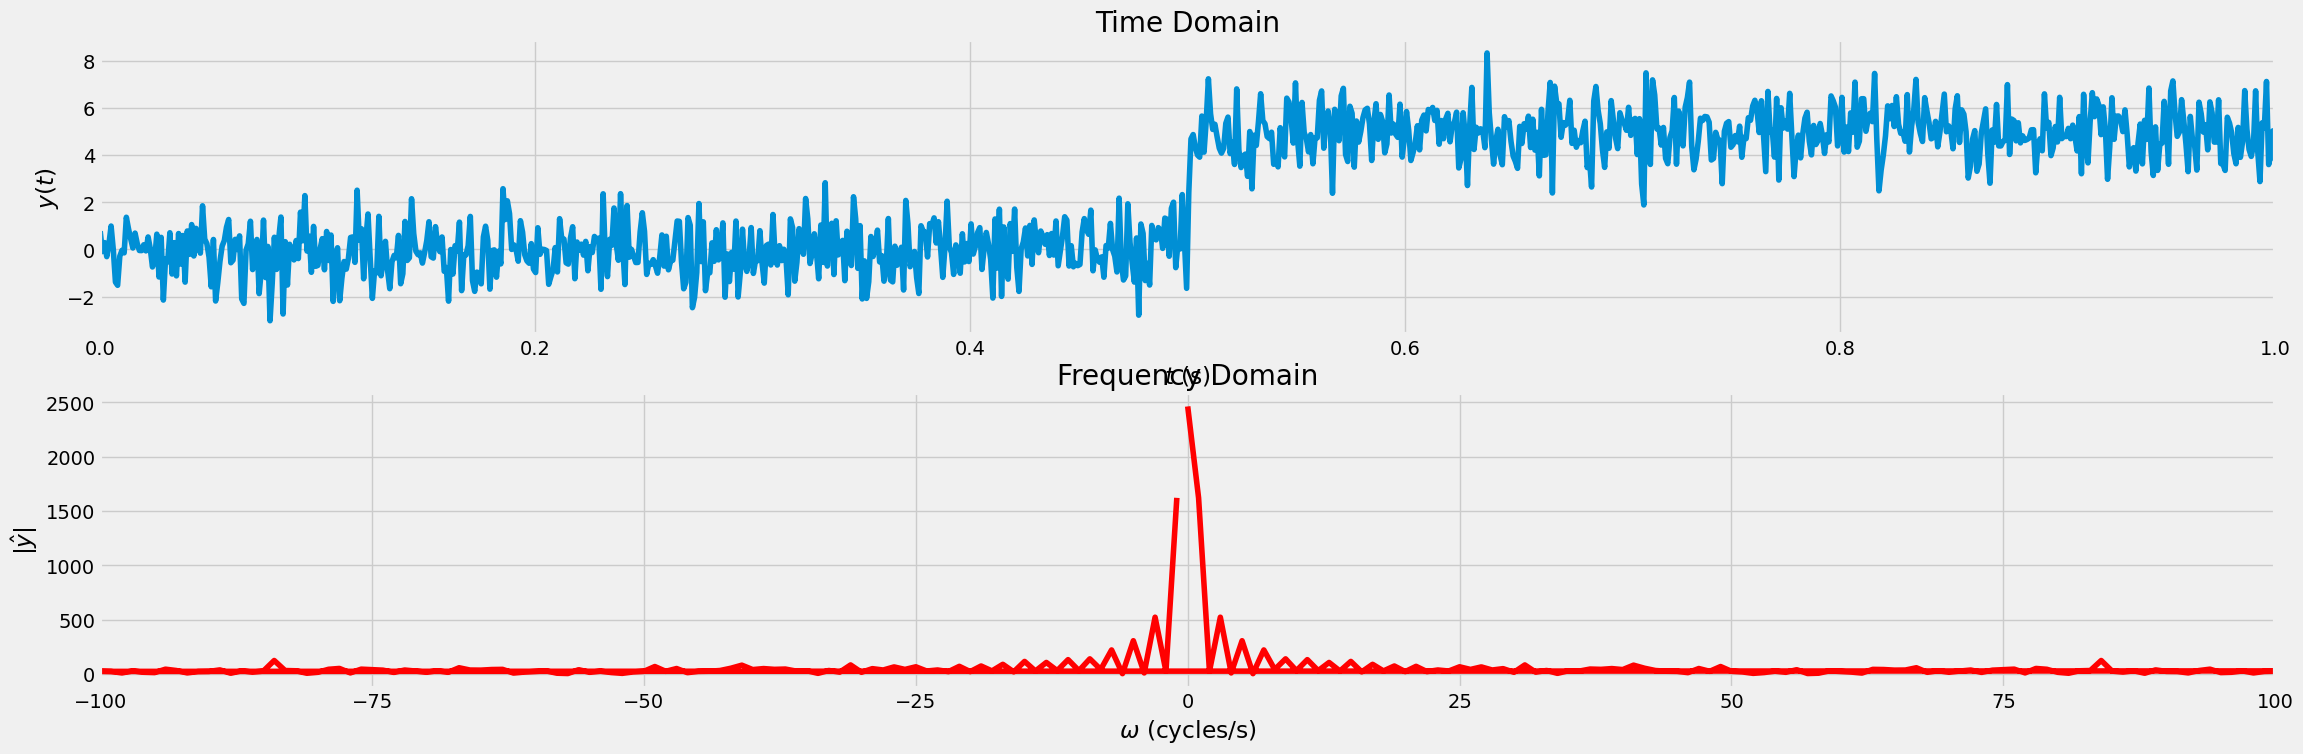

In [35]:
# Generate a signal
switch_fs         = 1000;                                        # sampled at 1 kHz = 1000 samples / second
switch_tlims      = [0,1]                                        # in seconds
switch_signalFreq = [2,50];                                      # Cycles / second
switch_signalMag  = [1,0.2];                                     # magnitude of each sine
switch_t          = np.linspace(switch_tlims[0],switch_tlims[1],(switch_tlims[1]-switch_tlims[0])*switch_fs)
switch_y          = np.array([ np.where(i<0.5, 0, 5) for i in switch_t], dtype='float32')

# Add some noise
switch_noise_amplitude   = 1
switch_noise             = np.random.randn(*switch_y.shape) * switch_noise_amplitude
switch_noise_spikes      = switch_noise.copy()
switch_noise_prob        =  0.9                                                      #probability of occur noisy sample
for i in range(len(switch_noise)):
    if np.random.rand() > switch_noise_prob:
        pass
    else:
        switch_noise_spikes[i] = 0
        
switch_y += switch_noise

# Compute the Fourier transform
switch_yhat    = np.fft.fft(switch_y);                          # Signal in frequency domain
switch_fcycles = np.fft.fftfreq(len(switch_t),d=1.0/switch_fs); # the frequencies in cycles/s

# Plot the signal
fig, ax = plt.subplots(2,1,figsize=(25,8))
ax[0].plot(switch_t,switch_y);
ax[0].set_title('Time Domain')
ax[0].set_ylabel("$y(t)$");
ax[0].set_xlabel("$t$ (s)");
ax[0].set_xlim([min(switch_t),max(switch_t)]);

# Plot the power spectrum
ax[1].plot(switch_fcycles, np.absolute(switch_yhat), color='red');
ax[1].set_title('Frequency Domain')
ax[1].set_xlim([-100,100]);
ax[1].set_xlabel("$\omega$ (cycles/s)")
ax[1].set_ylabel("$|\hat{y}|$");

### SWITCH SIGNAL IN DIGITAL

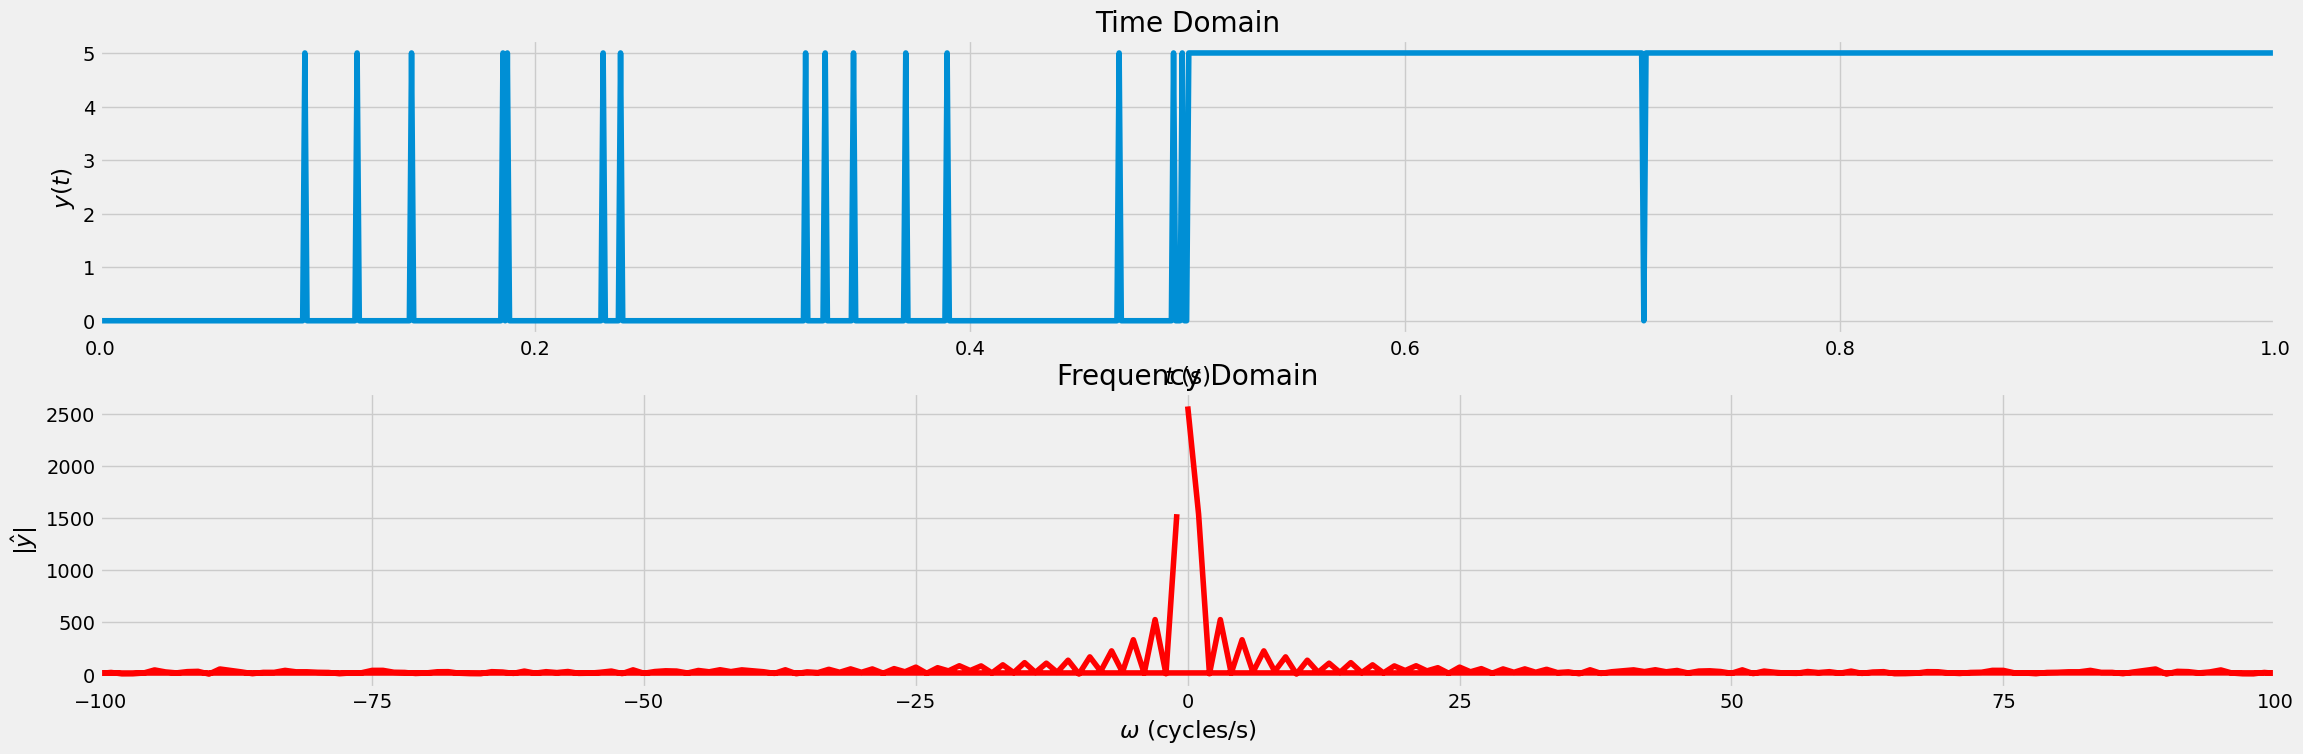

In [36]:
lower_bound = 2
upper_bound = 2
switch_y_digital = switch_y.copy()
for i in range(len(switch_y)):
    if switch_y[i] < lower_bound:
        switch_y_digital[i] = 0
    elif switch_y[i] > upper_bound:
        switch_y_digital[i] = 5
    
# Compute the Fourier transform
switch_yhat_digital    = np.fft.fft(switch_y_digital)                            # Signal in frequency domain
switch_fcycles_digital = np.fft.fftfreq(len(switch_t),d=1.0/switch_fs)           # the frequencies in cycles/s

# Plot the signal
fig, ax = plt.subplots(2,1,figsize=(25,8))
ax[0].plot(switch_t ,switch_y_digital);
ax[0].set_title('Time Domain')
ax[0].set_ylabel("$y(t)$");
ax[0].set_xlabel("$t$ (s)");
ax[0].set_xlim([min(switch_t),max(switch_t)]);

# Plot the power spectrum
ax[1].plot(switch_fcycles_digital, np.absolute(switch_yhat_digital), color='red');
ax[1].set_title('Frequency Domain')
ax[1].set_xlim([-100,100]);
ax[1].set_xlabel("$\omega$ (cycles/s)")
ax[1].set_ylabel("$|\hat{y}|$");

***

### EXPONENTIAL SMOOTHING IN ANALOG

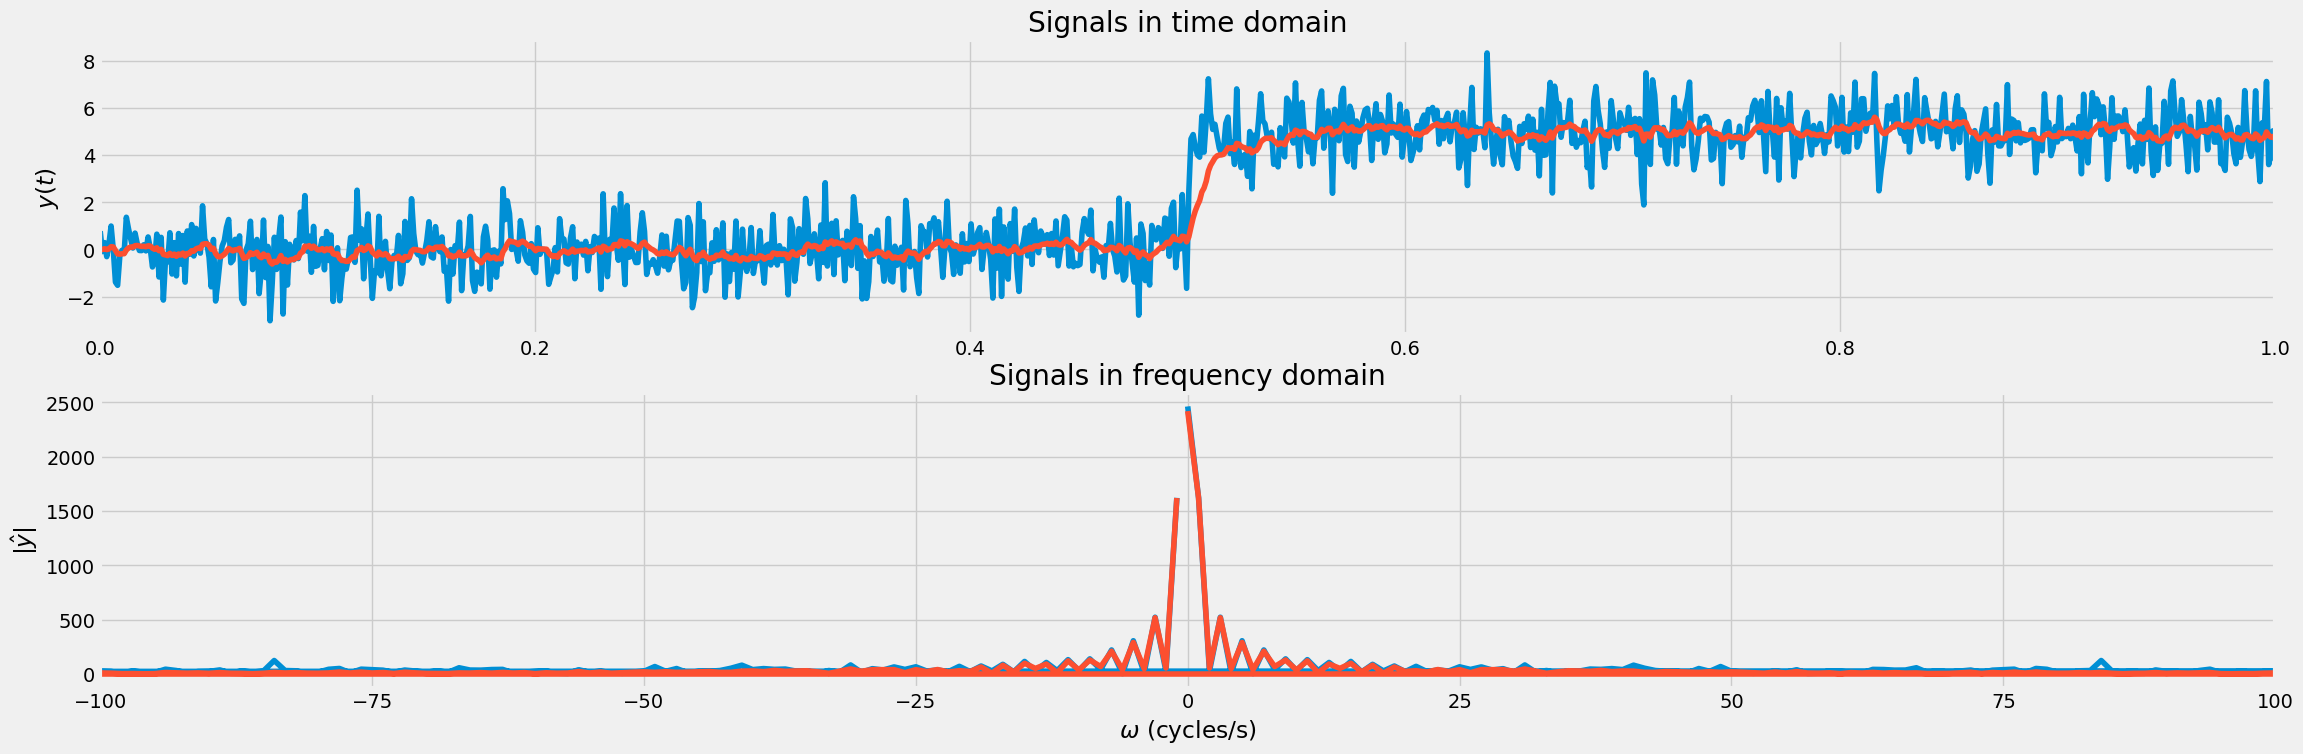

In [40]:
# Filter the signal
smoothing_factor =  0.9
switch_yfilt     = np.zeros(len(switch_y));
for i in range(2,len(switch_y)):
    switch_yfilt[i] = smoothing_factor  * switch_yfilt[i-1] + (1-smoothing_factor) * switch_y[i];

    
    
# Generate Fourier transform
switch_yfilthat = np.fft.fft(switch_yfilt)
switch_fcycles = np.fft.fftfreq(len(switch_t),d=1.0/switch_fs)

# Plot the signal
fig, ax = plt.subplots(2, 1, figsize=(25,8))
ax[0].plot(switch_t, switch_y)
ax[0].plot(switch_t, switch_yfilt)
ax[0].set_title('Signals in time domain')
ax[0].set_ylabel("$y(t)$")
ax[0].set_xlim([min(switch_t),max(switch_t)]);

ax[1].plot(switch_fcycles,np.absolute(switch_yhat));
ax[1].plot(switch_fcycles,np.absolute(switch_yfilthat));
ax[1].set_title('Signals in frequency domain')
ax[1].set_xlim([-100,100]);
ax[1].set_xlabel("$\omega$ (cycles/s)");
ax[1].set_ylabel("$|\hat{y}|$");

### EXPONENTIAL SMOOTHING IN DIGIAL

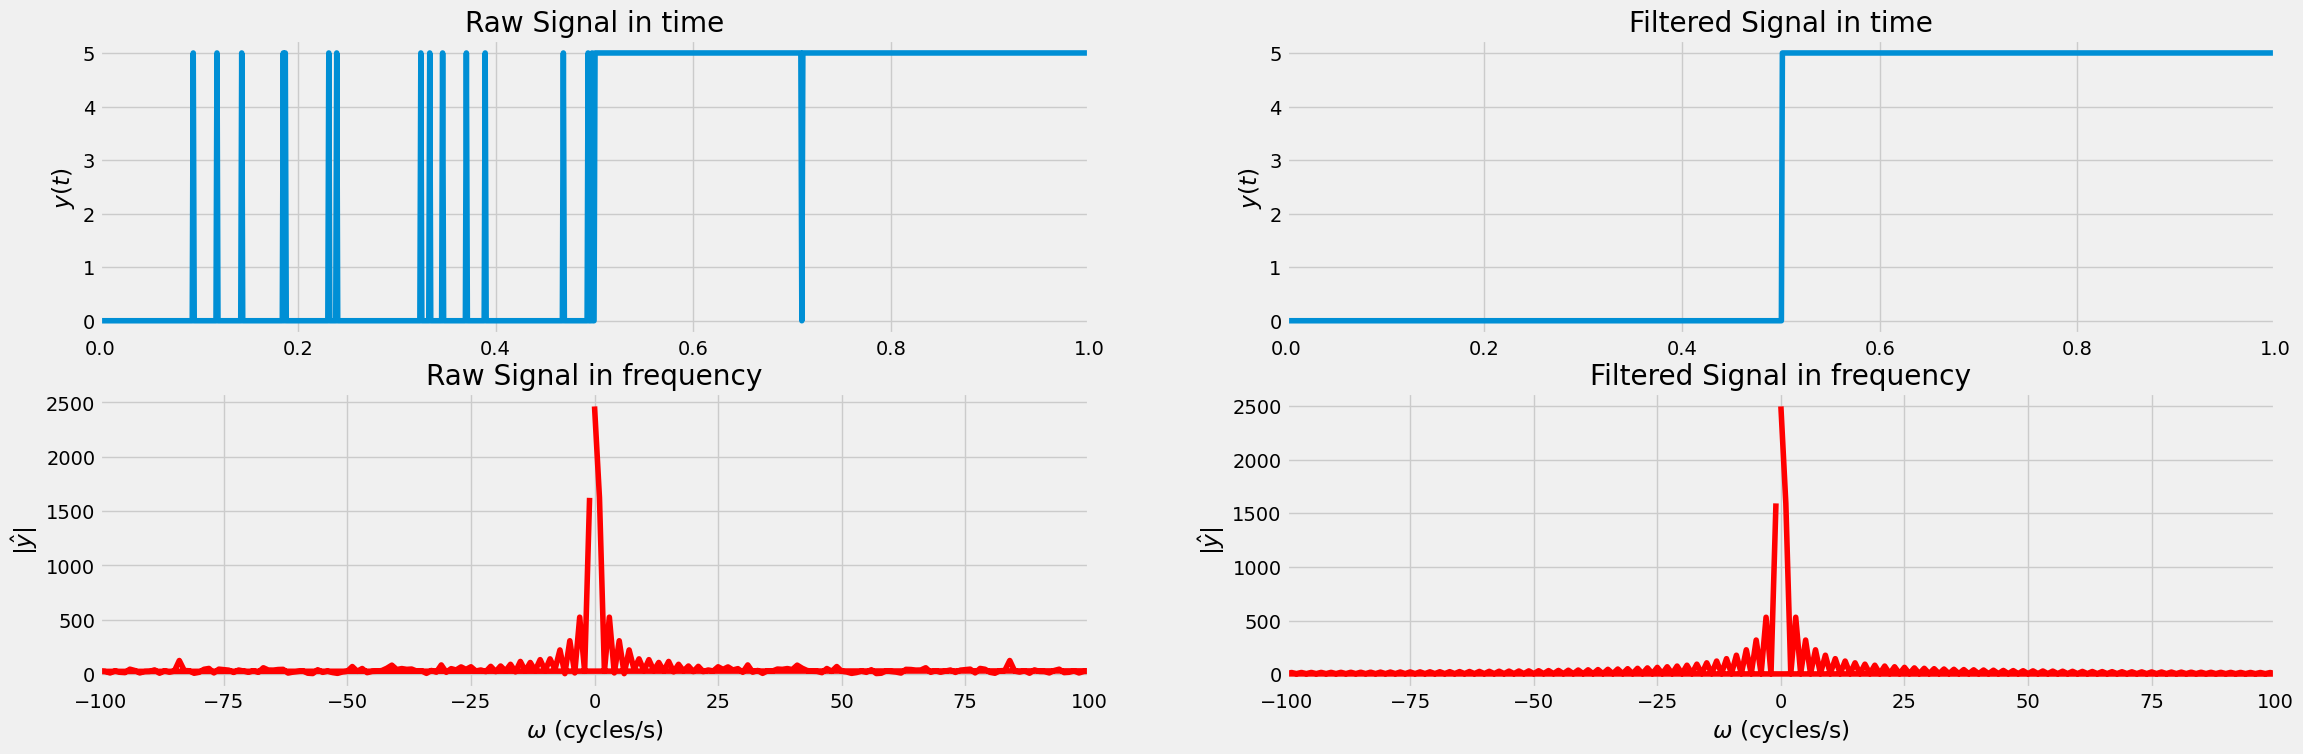

In [41]:
# Filter the signal
smoothing_factor =  0.2 
switch_yfilt_digital     = np.zeros(len(switch_y_digital));
for i in range(2,len(switch_y_digital)):
    switch_yfilt_digital[i] = (1 - smoothing_factor ) * switch_yfilt_digital[i-1] + smoothing_factor * switch_y_digital[i];

for i in range(len(switch_yfilt_digital)):
    if switch_yfilt_digital[i] < lower_bound:
        switch_yfilt_digital[i] = 0
    elif switch_yfilt_digital[i] > upper_bound:
        switch_yfilt_digital[i] = 5
        
# Generate Fourier transform
switch_yfilthat_digital = np.fft.fft(switch_yfilt_digital)
switch_fcycles          = np.fft.fftfreq(len(switch_t), d=1.0/switch_fs)

# Plot the signal
fig, ax = plt.subplots(2, 2, figsize=(25,8))
ax[0,0].plot(switch_t, switch_y_digital)
ax[0,0].set_title('Raw Signal in time')
ax[0,0].set_ylabel("$y(t)$")
ax[0,0].set_xlim([min(switch_t),max(switch_t)]);

ax[0,1].plot(switch_t, switch_yfilt_digital)
ax[0,1].set_title('Filtered Signal in time')
ax[0,1].set_ylabel("$y(t)$")
ax[0,1].set_xlim([min(switch_t),max(switch_t)]);

ax[1,0].plot(switch_fcycles,np.absolute(switch_yhat), color='red')
ax[1,0].set_title('Raw Signal in frequency')
ax[1,0].set_xlim([-100,100]);
ax[1,0].set_xlabel("$\omega$ (cycles/s)");
ax[1,0].set_ylabel("$|\hat{y}|$");

ax[1,1].plot(switch_fcycles,np.absolute(switch_yfilthat_digital), color='red')
ax[1,1].set_title('Filtered Signal in frequency')
ax[1,1].set_xlim([-100,100]);
ax[1,1].set_xlabel("$\omega$ (cycles/s)");
ax[1,1].set_ylabel("$|\hat{y}|$");

***

### EXPONENTIAL SMOOTHING WITH ACTUATING SIGNALS

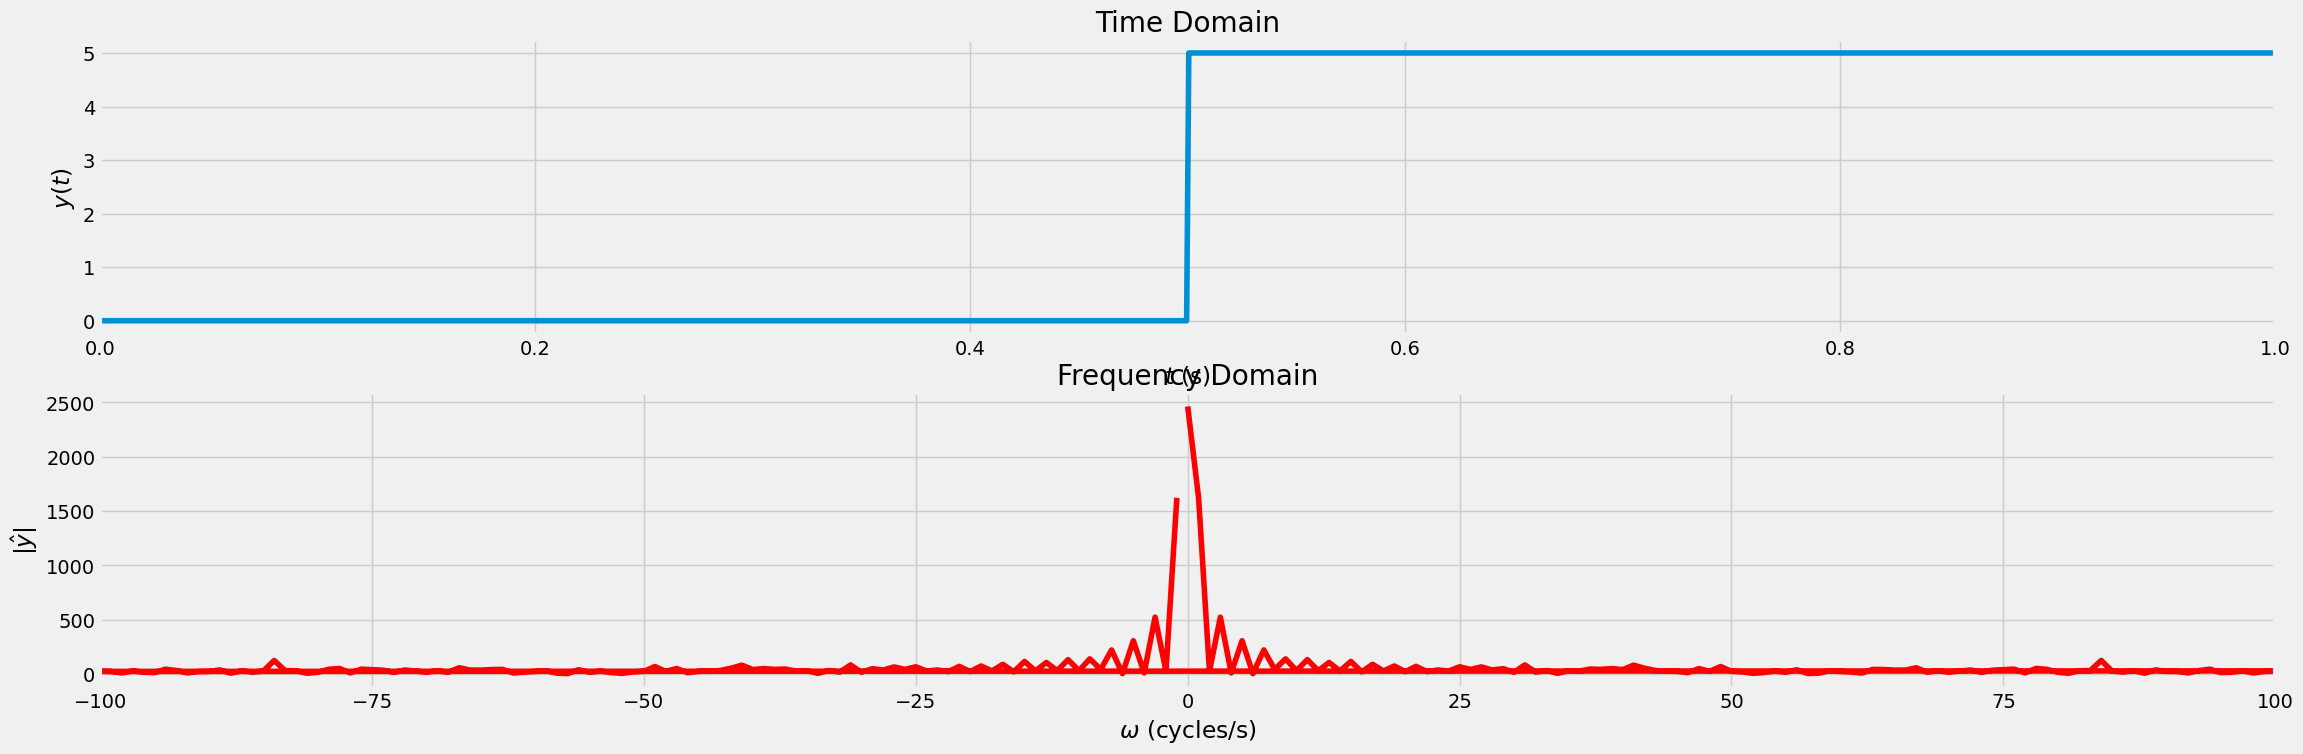

In [42]:
# Generate a signal
motor_fs         = 1000;                                        # sampled at 1 kHz = 1000 samples / second
motor_tlims      = [0,1]                                        # in seconds
motor_signalFreq = [2,50];                                      # Cycles / second
motor_signalMag  = [1,0.2];                                     # magnitude of each sine
motor_t          = np.linspace(switch_tlims[0],switch_tlims[1],(switch_tlims[1]-switch_tlims[0])*switch_fs)
motor_y          = np.array([ np.where(i<0.5, 0, 5) for i in switch_t], dtype='float32')


# Compute the Fourier transform
motor_yhat    = np.fft.fft(switch_y);                          # Signal in frequency domain
motor_fcycles = np.fft.fftfreq(len(switch_t),d=1.0/switch_fs); # the frequencies in cycles/s


# Plot the signal
fig, ax = plt.subplots(2,1,figsize=(25,8))
ax[0].plot(motor_t ,motor_y);
ax[0].set_title('Time Domain')
ax[0].set_ylabel("$y(t)$");
ax[0].set_xlabel("$t$ (s)");
ax[0].set_xlim([min(motor_t),max(motor_t)]);

# Plot the power spectrum
ax[1].plot(motor_fcycles, np.absolute(motor_yhat), color='red');
ax[1].set_title('Frequency Domain')
ax[1].set_xlim([-100,100]);
ax[1].set_xlabel("$\omega$ (cycles/s)")
ax[1].set_ylabel("$|\hat{y}|$");

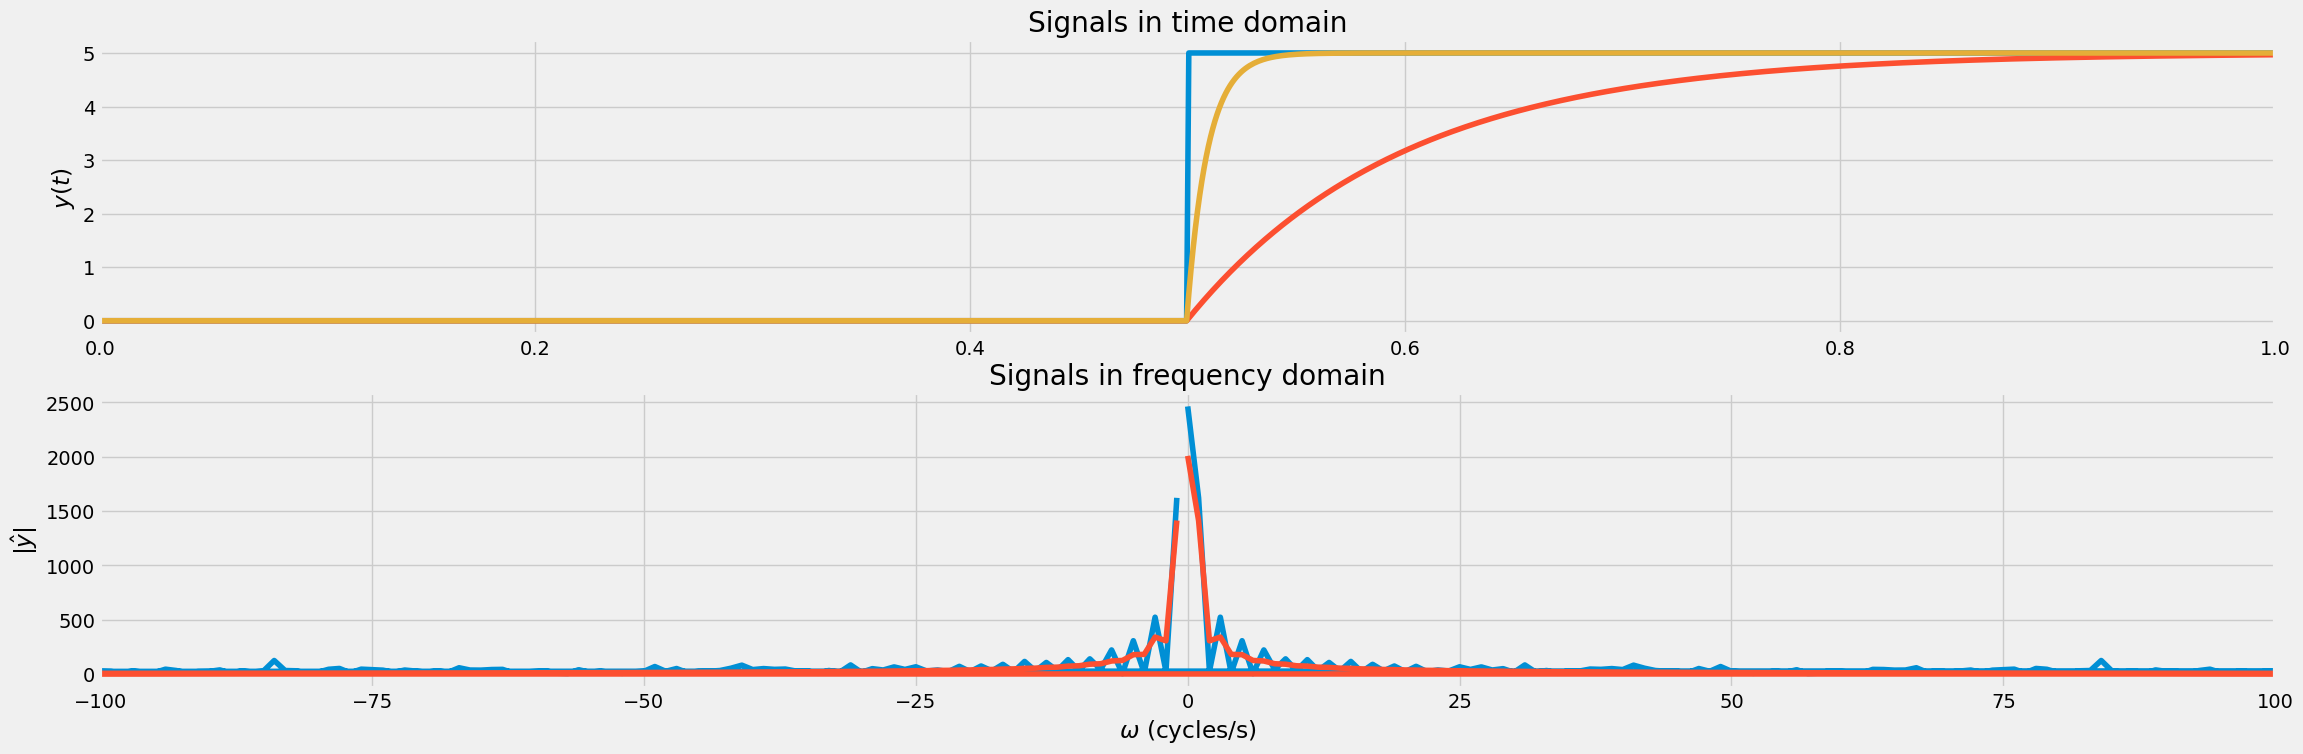

In [43]:
# Filter the signal
smoothing_factor =  0.99
motor_yfilt     = np.zeros(len(motor_y));
for i in range(2,len(switch_y)):
    motor_yfilt[i] = smoothing_factor  * motor_yfilt[i-1] + (1 - smoothing_factor) * motor_y[i];

    
smoothing_factor2 =  0.9
motor_yfilt2     = np.zeros(len(motor_y));
for i in range(2,len(switch_y)):
    motor_yfilt2[i] = smoothing_factor2  * motor_yfilt2[i-1] + (1 - smoothing_factor2) * motor_y[i];
    
# Generate Fourier transform
motor_yfilthat = np.fft.fft(motor_yfilt)
motor_fcycles = np.fft.fftfreq(len(motor_t),d=1.0/motor_fs)

# Plot the signal
fig, ax = plt.subplots(2, 1, figsize=(25,8))
ax[0].plot(motor_t, motor_y)
ax[0].plot(motor_t, motor_yfilt)
ax[0].plot(motor_t, motor_yfilt2)
ax[0].set_title('Signals in time domain')
ax[0].set_ylabel("$y(t)$")
ax[0].set_xlim([min(motor_t),max(motor_t)]);

ax[1].plot(motor_fcycles,np.absolute(motor_yhat));
ax[1].plot(motor_fcycles,np.absolute(motor_yfilthat));
ax[1].set_title('Signals in frequency domain')
ax[1].set_xlim([-100,100]);
ax[1].set_xlabel("$\omega$ (cycles/s)");
ax[1].set_ylabel("$|\hat{y}|$");

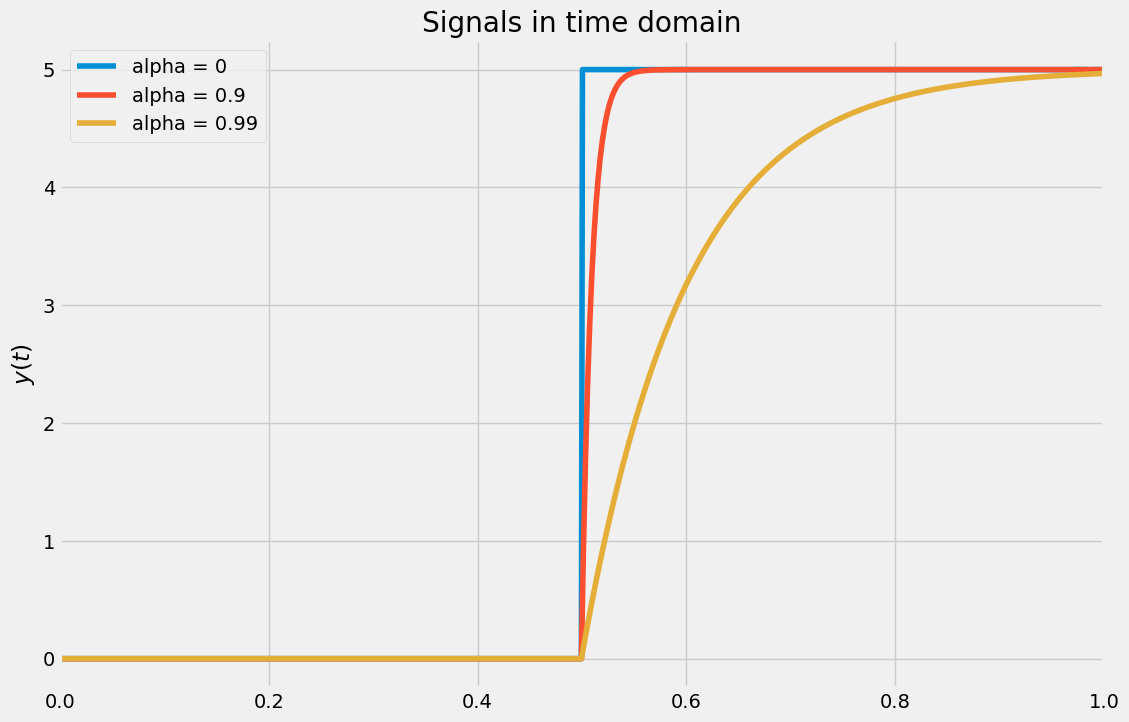

In [32]:
# Filter the signal
smoothing_factor =  0.99
motor_yfilt     = np.zeros(len(motor_y));
for i in range(2,len(switch_y)):
    motor_yfilt[i] = smoothing_factor  * motor_yfilt[i-1] + (1 - smoothing_factor) * motor_y[i];

    
smoothing_factor2 =  0.9
motor_yfilt2     = np.zeros(len(motor_y));
for i in range(2,len(switch_y)):
    motor_yfilt2[i] = smoothing_factor2  * motor_yfilt2[i-1] + (1 - smoothing_factor2) * motor_y[i];
    
# Generate Fourier transform
motor_yfilthat = np.fft.fft(motor_yfilt)
motor_fcycles = np.fft.fftfreq(len(motor_t),d=1.0/motor_fs)

# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.plot(motor_t, motor_y, label='alpha = 0')
ax.plot(motor_t, motor_yfilt2, label='alpha = 0.9')
ax.plot(motor_t, motor_yfilt, label='alpha = 0.99')
ax.set_title('Signals in time domain')
ax.set_ylabel("$y(t)$")
ax.set_xlim([min(motor_t),max(motor_t)]);
plt.legend()

fig.savefig("Alpha_Change.png")

***

# ENCODER

### ENCODER SIGNAL IN ANALOG

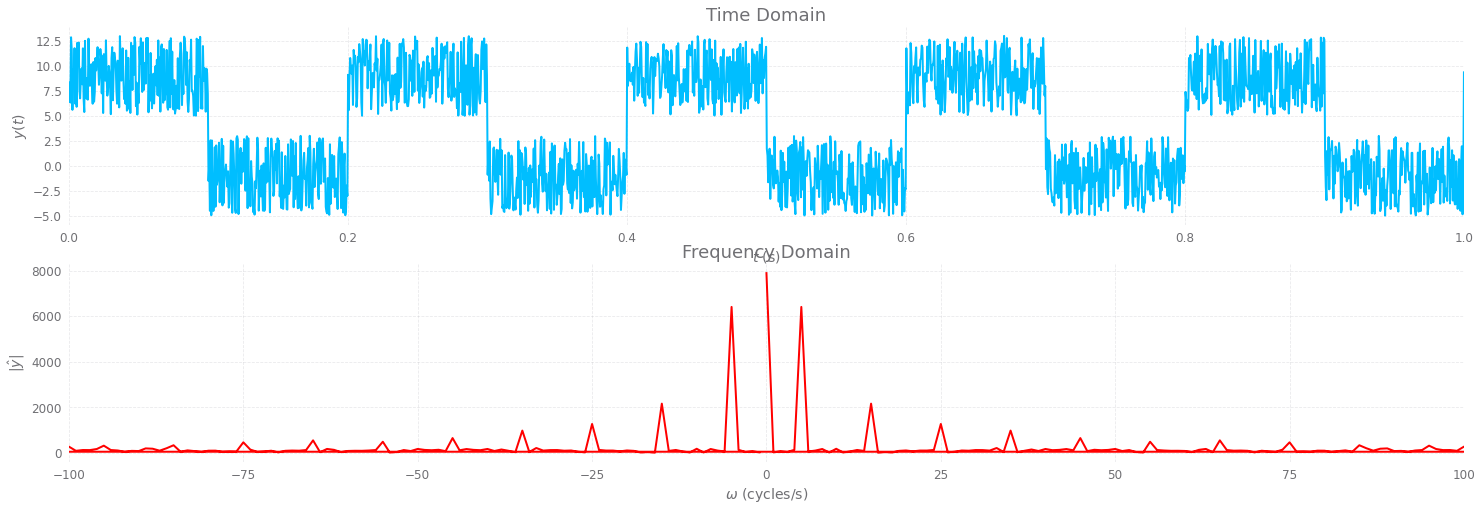

In [87]:
# Generate a signal
encoder_amplitude  = 5                         # Encoder Amplitude
encoder_fs         = 2000;                     # sampled at 1 kHz = 1000 samples / second
encoder_tlims      = [0,1]                     # in seconds
encoder_signalFreq = [2,50];                   # Cycles / second
encoder_signalMag  = [1,0.2];                  # magnitude of each sine
encoder_t = np.linspace(encoder_tlims[0],encoder_tlims[1],(encoder_tlims[1]-encoder_tlims[0])*encoder_fs)
encoder_y = encoder_amplitude * signal.square(2 * np.pi * 5 * encoder_t)

# Add some noise 
encoder_noise_amplitude          = 8
encoder_noise                    = np.random.rand(*encoder_y.shape) * encoder_noise_amplitude    
encoder_y                        += encoder_noise

# Compute the Fourier transform
encoder_yhat    = np.fft.fft(encoder_y)                             # Signal in frequency domain
encoder_fcycles = np.fft.fftfreq(len(encoder_t),d=1.0/encoder_fs)   # the frequencies in cycles/s

# Plot the signal
fig, ax = plt.subplots(2,1,figsize=(25,8))
ax[0].plot(encoder_t,encoder_y);
ax[0].set_title('Time Domain')
ax[0].set_ylabel("$y(t)$");
ax[0].set_xlabel("$t$ (s)");
ax[0].set_xlim([min(encoder_t),max(encoder_t)]);

# Plot the power spectrum
ax[1].plot(encoder_fcycles, np.absolute(encoder_yhat), color='red');
ax[1].set_title('Frequency Domain')
ax[1].set_xlim([-100,100]);
ax[1].set_xlabel("$\omega$ (cycles/s)")
ax[1].set_ylabel("$|\hat{y}|$");

### ENCODER SIGNAL IN DIGITAL

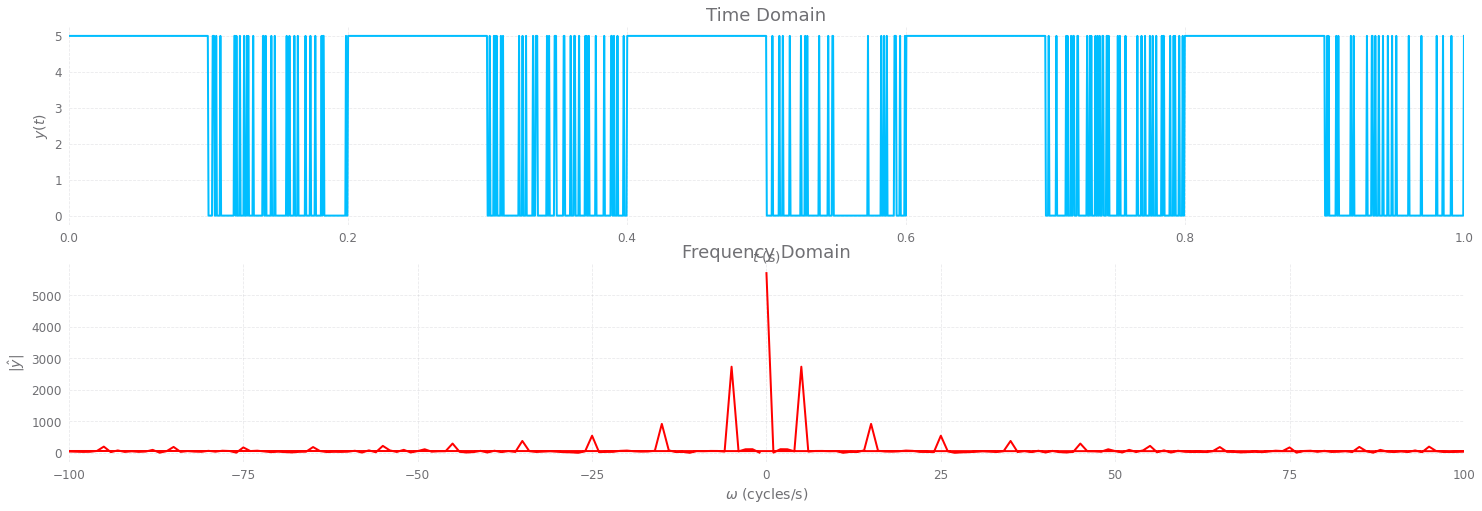

In [76]:
lower_bound = 2
upper_bound = 2
encoder_y_digital = encoder_y.copy()
for i in range(len(encoder_y)):
    if encoder_y[i] < lower_bound:
        encoder_y_digital[i] = 0
    elif encoder_y[i] > upper_bound:
        encoder_y_digital[i] = 5
    
# Compute the Fourier transform
encoder_yhat_digital    = np.fft.fft(encoder_y_digital)                             # Signal in frequency domain
encoder_fcycles_digital = np.fft.fftfreq(len(encoder_t),d=1.0/encoder_fs)           # the frequencies in cycles/s

# Plot the signal
fig, ax = plt.subplots(2,1,figsize=(25,8))
ax[0].plot(encoder_t ,encoder_y_digital);
ax[0].set_title('Time Domain')
ax[0].set_ylabel("$y(t)$");
ax[0].set_xlabel("$t$ (s)");
ax[0].set_xlim([min(t),max(t)]);

# Plot the power spectrum
ax[1].plot(encoder_fcycles_digital, np.absolute(encoder_yhat_digital), color='red');
ax[1].set_title('Frequency Domain')
ax[1].set_xlim([-100,100]);
ax[1].set_xlabel("$\omega$ (cycles/s)")
ax[1].set_ylabel("$|\hat{y}|$");

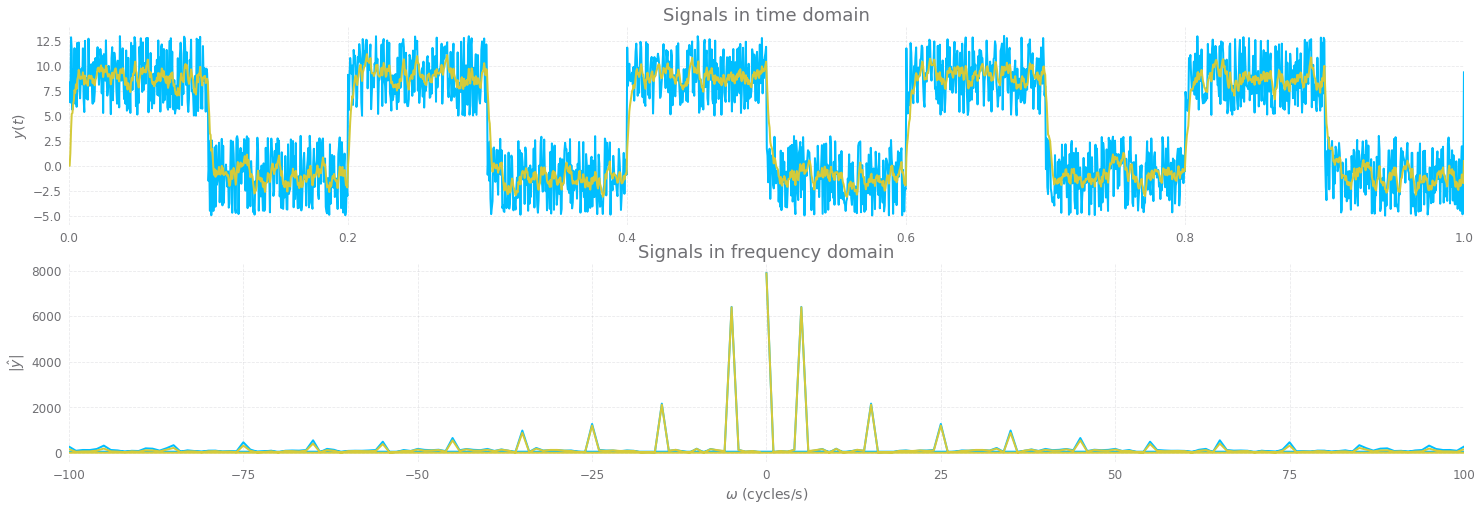

In [100]:
# Filter the signal
smoothing_factor =  0.2 
encoder_yfilt     = np.zeros(len(encoder_y));
for i in range(2,len(encoder_y)):
    encoder_yfilt[i] = (1 - smoothing_factor ) * encoder_yfilt[i-1] + smoothing_factor * encoder_y[i];

# Generate Fourier transform
encoder_yfilthat = np.fft.fft(encoder_yfilt)
encoder_fcycles = np.fft.fftfreq(len(encoder_t),d=1.0/encoder_fs)

# Plot the signal
fig, ax = plt.subplots(2, 1, figsize=(25,8))
ax[0].plot(encoder_t, encoder_y)
ax[0].plot(encoder_t, encoder_yfilt)
ax[0].set_title('Signals in time domain')
ax[0].set_ylabel("$y(t)$")
ax[0].set_xlim([min(encoder_t),max(encoder_t)]);

ax[1].plot(encoder_fcycles,np.absolute(encoder_yhat));
ax[1].plot(encoder_fcycles,np.absolute(encoder_yfilthat))
ax[1].set_title('Signals in frequency domain')
ax[1].set_xlim([-100,100]);
ax[1].set_xlabel("$\omega$ (cycles/s)");
ax[1].set_ylabel("$|\hat{y}|$");

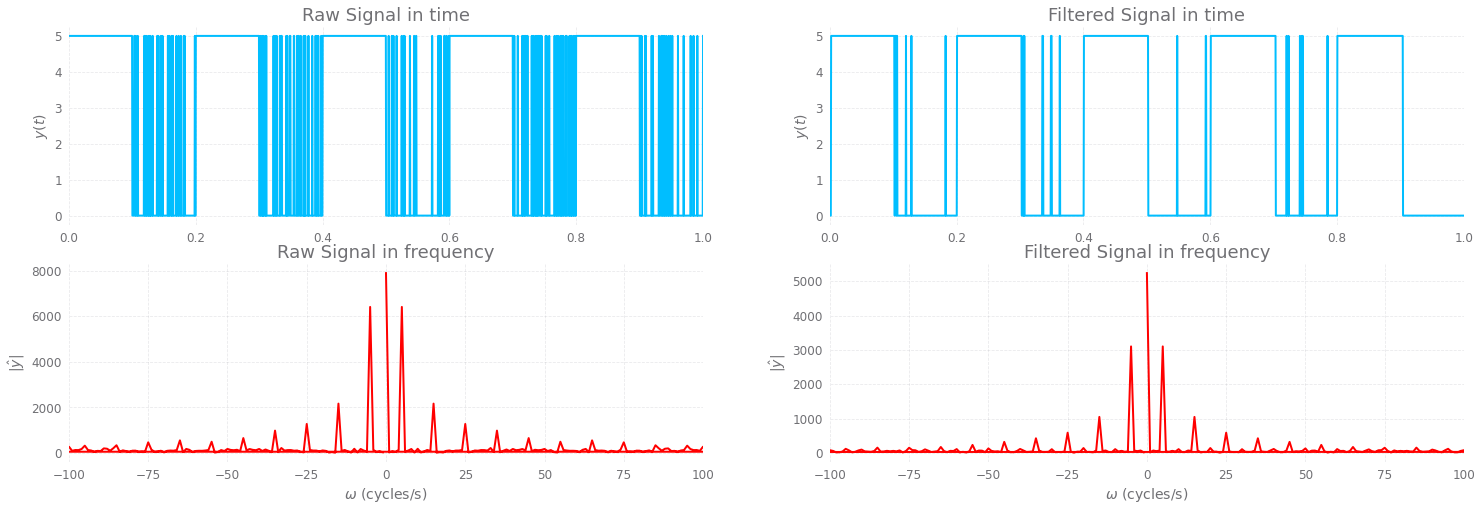

In [101]:
# Filter the signal
smoothing_factor =  0.2 
encoder_yfilt_digital     = np.zeros(len(encoder_y_digital));
for i in range(2,len(encoder_y_digital)):
    encoder_yfilt_digital[i] = (1 - smoothing_factor ) * encoder_yfilt_digital[i-1] + smoothing_factor * encoder_y_digital[i];

for i in range(len(encoder_yfilt_digital)):
    if encoder_yfilt_digital[i] < lower_bound:
        encoder_yfilt_digital[i] = 0
    elif encoder_yfilt_digital[i] > upper_bound:
        encoder_yfilt_digital[i] = 5
        
# Generate Fourier transform
encoder_yfilthat_digital = np.fft.fft(encoder_yfilt_digital)
encoder_fcycles          = np.fft.fftfreq(len(encoder_t), d=1.0/encoder_fs)

# Plot the signal
fig, ax = plt.subplots(2, 2, figsize=(25,8))
ax[0,0].plot(encoder_t, encoder_y_digital)
ax[0,0].set_title('Raw Signal in time')
ax[0,0].set_ylabel("$y(t)$")
ax[0,0].set_xlim([min(encoder_t),max(encoder_t)]);

ax[0,1].plot(encoder_t, encoder_yfilt_digital)
ax[0,1].set_title('Filtered Signal in time')
ax[0,1].set_ylabel("$y(t)$")
ax[0,1].set_xlim([min(encoder_t),max(encoder_t)]);

ax[1,0].plot(encoder_fcycles,np.absolute(encoder_yhat), color='red')
ax[1,0].set_title('Raw Signal in frequency')
ax[1,0].set_xlim([-100,100]);
ax[1,0].set_xlabel("$\omega$ (cycles/s)");
ax[1,0].set_ylabel("$|\hat{y}|$");

ax[1,1].plot(encoder_fcycles,np.absolute(encoder_yfilthat_digital), color='red')
ax[1,1].set_title('Filtered Signal in frequency')
ax[1,1].set_xlim([-100,100]);
ax[1,1].set_xlabel("$\omega$ (cycles/s)");
ax[1,1].set_ylabel("$|\hat{y}|$");